# Regresión Logistica con Python y scikit-learn

En este artículo, exploraremos cómo utilizar **la regresión logística con Python para construir algoritmo de machine learning para clasificación de datos de un evento binario o multiclase**. Antes de profundizar en la regresión logística, es importante tener una comprensión sólida de los requisitos previos necesarios para abordar esta técnica de modelado.

Estos son los requisitos previos que se necesitan para abordar la regresión logistica con Python:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)
 
- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)

- [Conocimiento de los fundamentos de regresión lineal](https://deepnote.com/@mazzaroli/Regresion-Lineal-con-Python-y-scikit-learn-86f7bb72-770c-4e28-9e84-0355aed93892)


## Que es la regresion logistica?

En el ámbito del Machine Learning, existen tres tipos de algoritmos: el aprendizaje supervisado, el aprendizaje no supervisado y el aprendizaje por refuerzo. **La regresión logística es un algoritmo de aprendizaje supervisado**

Dentro del aprendizaje supervisados están los **algoritmos de clasificación y regresión**

**La regresión logística se utiliza** principalmente **para problemas de clasificación**, **donde se tiene que predecir la probabilidad de que un evento pertenezca a una de dos categorías posibles**, como (sí/no), (verdadero/falso), (spam/no spam), entre otros.

**La idea** básica detrás **de la regresión logística es crear una función** matemática **que pueda clasificar los datos acorde a la relación entre sus características** o variables predictoras y la variable objetivo o la categoría a predecir. **Esta función es la función sigmoide** y su fórmula y grafico son los siguiente.

$\displaystyle s(x) = \frac{1}{(1 + e^{-x})}$

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/1200px-Funci%C3%B3n_sigmoide_01.svg.png' width=400>

**La función sigmoide se utiliza para calcular la probabilidad de que un evento pertenezca a una de dos categorías posibles,** tomando cualquier valor de entrada y comprimiendolo a un rango entre 0 y 1, lo que la hace ideal para estimar la probabilidad.

- **Si la probabilidad es mayor que 0.5**, se clasifica como **perteneciente a la categoría 1**,

- **Si es menor que 0.5**, se clasifica como **perteneciente a la categoría 0.** 

En otras palabras, si la probabilidad calculada es mayor al 50%, se predice que el evento pertenece a la categoría 1, y si es menor al 50%, se predice que pertenece a la categoría 0.


### Ejemplo

Supongamos que **un profesor quiere predecir la probabilidad de que un estudiante apruebe un examen en función de las horas de estudio.** Para ello, **recopila datos de 50 estudiantes** que han tomado el examen en el pasado y **registra las horas que cada uno estudió y si aprobó o no el examen**. A continuación, **el profesor construye un modelo de regresión logística para predecir la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio.**

El profesor asigna la variable **"1" si un estudiante aprueba** el examen y **"0" si no lo aprueba**. Luego, utiliza la **probabilidad de aprobar como variable objetivo** (eje $Y$) y las **horas de estudio como variables predictoras** (eje $X$). Luego, **ajusta la función sigmoide al conjunto de datos** para estimar la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio.

Finalmente, el profesor puede utilizar este modelo para predecir la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio que dedica. 

Por ejemplo, **si un estudiante estudia durante 10 horas**, la función sigmoide puede predecir **una probabilidad del 80% de que el estudiante apruebe el examen**. En cambio, **si un estudiante estudia solo 5 horas**, la función sigmoide puede predecir **una probabilidad del 40% de que el estudiante apruebe el examen**.


<img src='https://datascientest.com/es/wp-content/uploads/sites/7/2020/10/unnamed-4.png' width=400>


## Tu primera clasificación con regresión logística

Aprenderemos a construir nuestra primera regresión logística con Python y la librería Scikit-learn en solo unos pocos pasos.

### Importar librerías

In [1]:
import numpy as np  # Librería para operaciones matemáticas con arrays
import pandas as pd  # Librería para manipulación de datos en formato tabla
import matplotlib.pyplot as plt  # Librería para visualización de gráficos
import seaborn as sns  # Librería para visualización de datos estadísticos
from sklearn.datasets import load_digits  # Conjunto de datos de dígitos escritos a mano
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

### Carga de datos

**[load_digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)** es un conjunto de datos de dígitos escritos a mano que **consta de 1.797 imágenes** de **resolución 8x8 píxeles**, **cada píxel está representado como un valor en escala de grises entre 0 y 16**. 


**Las etiquetas corresponden a los números enteros del 0 al 9**, por lo que es útil para tareas de clasificación multiclase y es comúnmente utilizado como un ejemplo introductorio en la clasificación de imágenes en Machine Learning.

<img src='https://user-images.githubusercontent.com/8764683/59962629-0d3ce780-9523-11e9-8b21-5ffc9c588fd7.png' width=700>

In [68]:
# Cargamos el conjunto de datos digits
digits = load_digits()

In [69]:
# Accedemos a la primera fila de datos que representa la primera imagen en formato vectorial
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [70]:
# Transforma el vector de la primera imagen en una matriz de 8x8 píxeles
image = np.reshape(digits.data[8],(8,8))
image

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

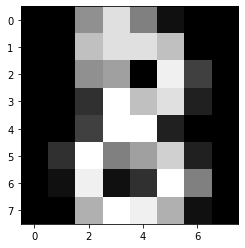

In [71]:
# Vemos la representación del a primera imagen
plt.imshow(image,cmap='gray')

## Split de datos en train y test

Al hacer un split de datos en train y test, separamos nuestro conjunto de datos en dos partes: 

- **train:** para entrenar el modelo.
- **test:**  para evaluar el desempeño del modelo. 

Esto nos permite evaluar la capacidad de nuestro modelo para generalizar a datos nuevos y no vistos durante el entrenamiento.

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [73]:
print(f"""X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}""")

X_train: (1437, 64)
y_train: (1437,)

X_test: (360, 64)
y_test: (360,)


### Entrenamiento de modelo

In [83]:
# Instanciamos y ajustamos el modelo de regresión logística
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
pred = logistic_reg.predict(X_test)

## Evaluación del modelo

96.66666666666667


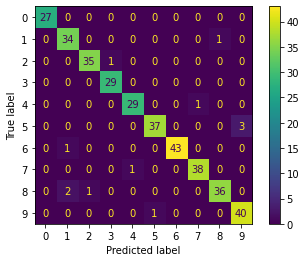

In [82]:
# ignorar las advertencias de FutureWarning.
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

plot_confusion_matrix(logistic_reg,X_test, y_test);
print(accuracy_score(y_test,pred)*100)

En nuestra evaluación del modelo logístico, obtuvimos una alta precisión y la mayoría de las predicciones fueron correctas. 

Nuestro modelo obtuvo un accuracy_score del 96.6%, lo que indica que es capaz de predecir correctamente la categoría del número en la mayoría de las veces.

### Carguemos nuestros propios números

Implementaremos un código que permitirá cargar imágenes hechas a mano y utilizar el modelo de regresión logística previamente entrenado para predecir qué dígito corresponde a cada imagen. Luego, se visualizará cada imagen con su respectiva predicción.

Si deseas replicarlo puedes probar con tus propias imagenes y ver si predice bien o no las imagenes.

In [84]:
from PIL import Image # Importamos la librería PIL para trabajar con imágenes
import numpy as np # Importamos numpy para manejar los datos de las imágenes

def classify(img_path):
  image_raw = Image.open(img_path).convert('L') # Abrimos la imagen y la convertimos a escala de grises
  image_procesed = image_raw.resize((8,8)) # Redimensionamos la imagen a una de 8x8 pixeles
  image_procesed = [np.array(image_procesed).flatten()] # Aplanamos la imagen y la convertimos a un arreglo numpy
  prediction = logistic_reg.predict(image_procesed)[0] # Predecimos con el modelo previamente entrenado
  return image_raw, prediction

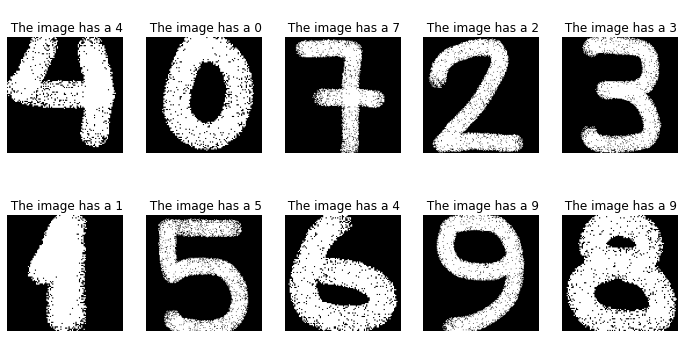

In [65]:
import matplotlib.pyplot as plt
import os

path = './handmade_digits'
files = os.listdir(path)

fig, ax = plt.subplots(2, 5, figsize=(12,6))

for i in range(2):
    for j in range(5):
        img,pred, = classify(f'./handmade_digits/{files[i*5+j]}')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'\n The image has a {pred}')

Después de cargar nuestros propios números y probarlos con el modelo de regresión logística, se obtuvo una predicción correcta para la mayoría de las imágenes. Sin embargo, el número 8 fue confundido con un 9 y el número 6 fue confundido con un 4.

## ¿Cuándo usar regresión logística?


La regresión logística es un modelo estadístico utilizado para analizar la relación entre una variable dependiente categórica y una o más variables independientes. 

### Ventajas

- **Fácil de implementar:** La regresión logística es relativamente fácil de implementar, se puede ajustar a los datos utilizando sklearn como vimos anteriormente. Además, se puede utilizar en conjunción con otros métodos de análisis, como análisis de regresión, análisis discriminante y análisis de supervivencia.

- **Coeficientes interpretables:** Los coeficientes de la regresión logística son fácilmente interpretables y proporcionan información sobre la relación entre las variables independientes y la variable dependiente. Esto permite identificar qué variables tienen un efecto significativo en la variable dependiente y cómo afectan a las probabilidades de una observación de pertenecer a una clase específica.

- **Inferencia de la importancia de cada característica:** Puede proporcionar información sobre la importancia relativa de cada feature en la predicción de la variable dependiente. Esto es útil en la selección de características para modelos predictivos, ya que permite a los investigadores centrarse en las variables más importantes y descartar las menos importantes.

- **Clasificación en porcentajes:** Se puede utilizar para predecir la probabilidad de una observación de pertenecer a una clase específica. Estas probabilidades se pueden convertir en una clasificación binaria utilizando un umbral de probabilidad, por ejemplo decir que con un 80% de certeza la clasificacion es 1

- **excelentes resultados con conjuntos de datos linealmente separables:** Si las dos clases están linealmente separadas, entonces la regresión logística puede encontrar una línea recta o un hiperplano que separe las dos clases y proporcionar una clasificación precisa.

### Desventajas

- **Asume linealidad entre las variables dependientes:** La regresión logística asume una relación lineal entre las variables independientes y la variable dependiente. Si la relación no es lineal, puede proporcionar estimaciones incorrectas y, por lo tanto, puede no ser el modelo adecuado para el análisis.

- **Overfitting sobre datasets de alta dimensionalidad:** Puede ser susceptible al overfitting en conjuntos de datos de alta dimensionalidad, es decir, puede ajustarse demasiado a los datos y producir modelos que no generalizan bien a nuevos datos.

- **Le afecta la multicolinealidad de variables:** La multicolinealidad se refiere a la alta correlación entre dos o más variables independientes. La regresión logística puede verse afectada por la multicolinealidad, lo que puede hacer que las estimaciones de los coeficientes de la regresión sean imprecisas.

- **Mejores resultados con datasets grandes:** La regresión logística puede proporcionar resultados más precisos y robustos cuando se aplica a conjuntos de datos grandes en lugar de pequeños. Esto se debe a que, en general, cuantas más observaciones haya en el conjunto de datos, más precisas serán las estimaciones de los parámetros del modelo.



### Cuando usarla?

- **Probabilidad de ocurrencia sobre un evento categórico:** Cuando se trata de analizar datos en los que se desea modelar la probabilidad de ocurrencia de un evento categórico, como si un cliente comprará o no un producto o si un paciente tiene una enfermedad o no.

- **Datasets linealmente separables:** Si los datos se pueden separar en dos grupos mediante una línea recta o hiperplano, entonces la regresión logística puede proporcionar una clasificación precisa y rápida.

- **Datasets grandes:** La regresión logística es adecuada para conjuntos de datos grandes y complejos debido a su rapidez y eficiencia. La regresión logística puede manejar grandes cantidades de datos y proporcionar resultados precisos y confiables.

- **Datasets balanceados:** La regresión logística es adecuada para conjuntos de datos balanceados, lo que significa que hay aproximadamente el mismo número de observaciones en cada categoría de la variable dependiente. Esto se debe a que la regresión logística se basa en el principio de máxima verosimilitud, que asume que las categorías en la variable dependiente son igualmente probables.

## Fórmula de regresión logística

La fórmula de la regresión logística es una expresión matemática que **describe la relación entre las variables predictoras y la probabilidad de que ocurra un evento binario**. La fórmula se escribe como:


$\displaystyle p = \frac{1}{1 + e^{\displaystyle-(b0 + b1x1 + b2x2 + ... + bnxn)}}$

donde:

- **p**: es la probabilidad del evento binario (por ejemplo, la probabilidad de éxito en una prueba)
- **e**: es la constante matemática e (2.71828...)
- **b0**: es la constante de intercepción (también llamada término de sesgo)
- **b1, b2, ..., bn**: son los coeficientes de las variables predictoras x1, x2, ..., xn

La ecuación de regresión logística **se basa en el modelo de odds** (razón de probabilidad), que **se define como la probabilidad de que un evento ocurra dividida por la probabilidad de que no ocurra.** En el caso de un evento binario, la odds se expresa como:

$\displaystyle odds = \frac{p}{(1 - p)}$

donde **p es la probabilidad del evento**. La odds puede tomar valores desde cero (cuando la probabilidad es cero) hasta infinito (cuando la probabilidad es uno).

La ecuación de regresión logística utiliza la **transformación logarítmica de la odds**, que se expresa como:

$\log(odds) = b0 + b1x1 + b2x2 + ... + bnxn$

Esta ecuación es equivalente a la ecuación de la regresión logística, ya que la transformación exponencial de la ecuación de odds da como resultado la ecuación de la regresión logística.

formula de la regresion logistica con los odds:

$\displaystyle p = \frac{1}{1 + e^{-\log(\frac{p}{1-p})}}$


**Para estimar los valores de los coeficientes b0, b1, ..., bn, se utiliza el método de máxima verosimilitud**. El método de máxima verosimilitud consiste en **encontrar los valores de los coeficientes que maximizan la probabilidad de observar los datos de entrenamiento**. Para ello, se define una función de verosimilitud $L(b0, b1, ..., bn)$ que mide la probabilidad de observar los datos dadas las estimaciones de los coeficientes:

$ \displaystyle \argmax L(b0, b1, ..., bn) = \Pi^{N}_{i=1}p^{y_i}(1-p)^{1-y_i}$

donde $y_i$ es el valor del evento binario (0 o 1) para el i-ésimo ejemplo, y $p$ es la probabilidad predicha por la ecuación de regresión logística. La función de verosimilitud se maximiza utilizando un algoritmo de optimización, como el método de Newton-Raphson.

Una vez que se han estimado los coeficientes, se pueden utilizar para predecir la probabilidad de ocurrencia del evento binario en nuevos datos de entrada.


# Proyecto de regresión logística binomial

[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

En este proyecto, trabajaremos con el dataset ["Telco Customer Churn"](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) para aplicar la regresión logística binomial y **predecir el abandono de clientes en una compañía de telecomunicaciones**.

Para ello, utilizaremos diferentes técnicas como la **preparación de datos**, **análisis exploratorio de los datos**, **aplicaremos el modelo de regresión logística construido** y finalmente **interpretaremos los resultados** obtenidos para comprender el churn de la empresa.

## Conociendo nuestro dataset

Este dataset contiene información de los clientes como su duración en la compañía, servicios contratados, facturación, entre otros. 

### Atributos:



## Conocinedo nuestro dataset
## Preparando los datos

### En el siguiente Data pre-processing

- eliminaremos duplicados 
- evaluaremos valores nulos 
- removeremos columnas innecesarias 
- procesaremos los datos categóricos 
- eliminaremos los outliers 
- escalaremos la data para su mejor uso en el modelo.





In [31]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [67]:
df[df['Contract']=='One year'].sort_values(by='MonthlyCharges', ascending=True)[['Contract','tenure','MonthlyCharges','TotalCharges','Churn']]

,Contract,tenure,MonthlyCharges,TotalCharges,Churn
3719,One year,28,18.25,534.7,No
1654,One year,1,18.80,18.8,No
1846,One year,19,18.80,279.2,No
6925,One year,15,18.80,294.95,No
4274,One year,45,18.85,867.3,No
...,...,...,...,...,...
4627,One year,60,116.60,7049.5,No
3299,One year,68,117.20,8035.95,No
4610,One year,72,117.80,8684.8,Yes
5127,One year,67,118.35,7804.15,Yes
